In [1]:
import glob
import os
import numpy as np
import ast

import cooltools
import cooltools.lib.plotting
from polykit.analysis import contact_maps as cms
import cooler
from cooltools.lib.numutils import adaptive_coarsegrain
import pandas as pd
import warnings
import h5py 

import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF')

import utils_s 

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/api/expected.py:14: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition


In [6]:
path_dict = {}

directory = '/scratch1/rahmanin/Site_wise_occupancy/simulations/'
for name  in glob.glob(directory+'sims/chr1/folder_*'):
    path_dict[name.split('/chr1/')[1][:]]= name
path_dict = dict(sorted(path_dict.items()))
len(path_dict)

1

In [7]:
name

'/scratch1/rahmanin/Site_wise_occupancy/simulations/sims/chr1/folder_face_1.0_back_0_Clife_150.0_Cof_150.0_life_660.0_slife_660.0_birth_0.1_pause_0.9_sep_75_site_10_monomer_500_replica_10_steps_175.0_vel_1'

### chip-seq analysis

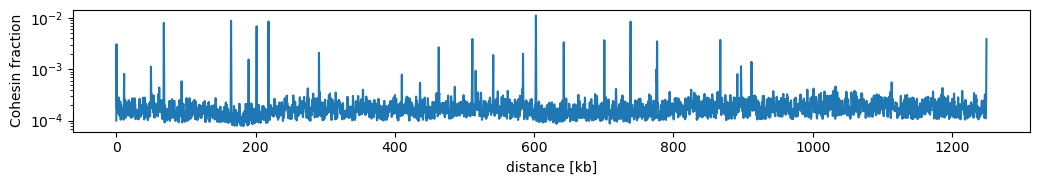

In [8]:
c = 1
for name in path_dict.keys():
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params

    c+=1
    mapN = mon*site
    lefs = h5py.File(path_dict[name]+'/LEFPositions.h5','r')["positions"]
    chip = utils_s.chip_seq_from_lef(lefs, mapN)
    lattice_size = 0.25 # in kb
    plt.figure(figsize = (10.5,1.95))
    plt.plot(np.arange(len(chip))*lattice_size,chip/np.sum(chip), label=name)

    plt.ylabel('Cohesin fraction')
    plt.yscale('log')
    plt.xlabel('distance [kb]')
    plt.tight_layout()
    plt.show()

### creating 1D maps

(1500000, 66, 2)


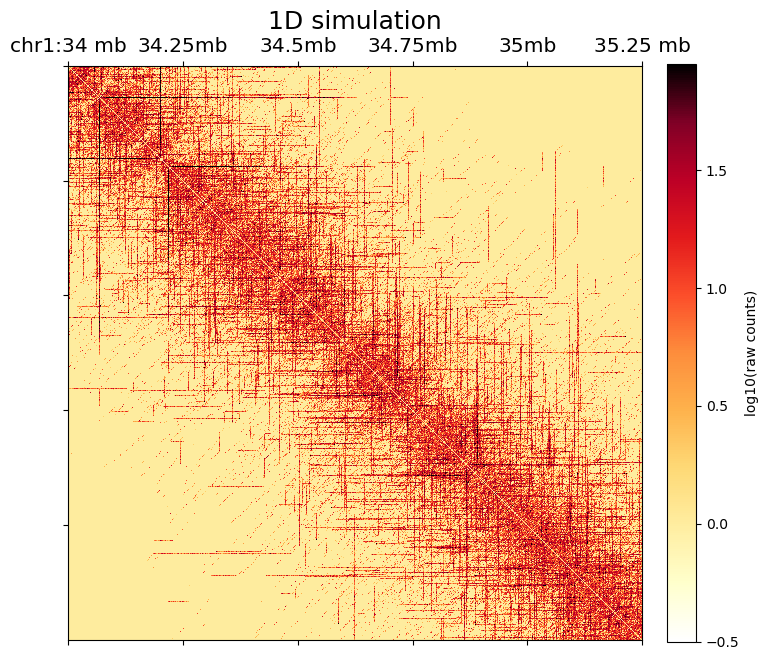

In [22]:
region = 'chr1:34000000-35250000'
plt.figure(figsize=(8.1,8.1))    
with  h5py.File(path_dict[name]+'/LEFPositions.h5', mode='r') as myfile:
    lef_array = np.array(myfile['positions'])
    print(lef_array.shape)   
lef_array_snip = lef_array[:10]
m = utils_s.contact_map_from_lefs(lef_array[:],5000)
im = plt.matshow(np.log10(m+1), vmax=1.95, vmin=-0.5,cmap='fall', fignum=False)
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')
plt.title('1D simulation',fontsize=18)
plt.xticks(utils_s.axes_ary(region)[0], fontsize = 6.1)
plt.xticks([0,1000,2000, 3000, 4000, 5000],fontsize=14.5)
plt.gca().set_xticklabels(['chr1:34 mb', '34.25mb', '34.5mb','34.75mb', '35mb', '35.25 mb'])
plt.gca().set_yticklabels([])
plt.show()


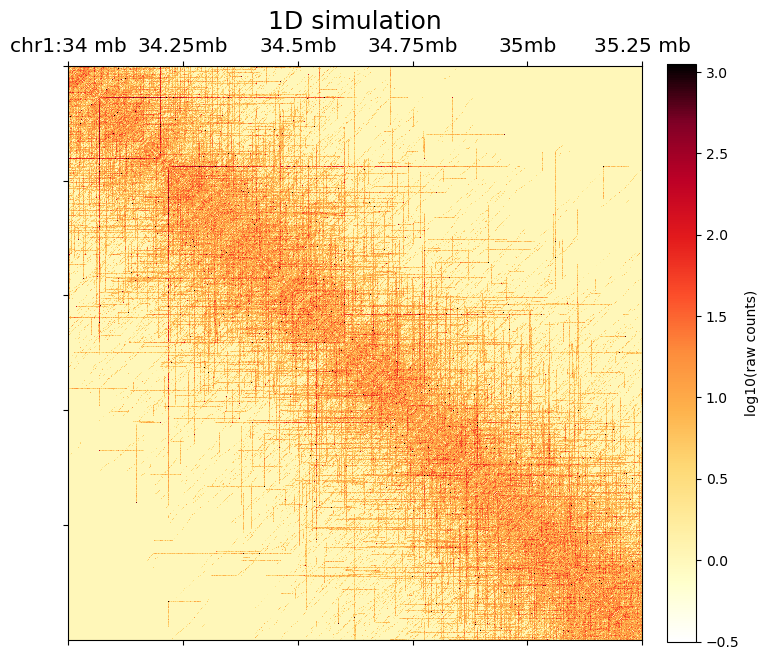

In [23]:
plt.figure(figsize=(8.1,8.1))  
new_m = adaptive_coarsegrain(m+1, m+1, cutoff = 3, max_levels=3, min_shape = 2)
im = plt.matshow(np.log10(new_m), vmax=3.05, vmin=-0.5,cmap='fall', fignum=False)
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')
plt.title('1D simulation',fontsize=18)
plt.xticks(utils_s.axes_ary(region)[0], fontsize = 6.1)
plt.xticks([0,1000,2000, 3000, 4000, 5000],fontsize=14.5)
plt.gca().set_xticklabels(['chr1:34 mb', '34.25mb', '34.5mb','34.75mb', '35mb', '35.25 mb'])
plt.gca().set_yticklabels([])
plt.show()

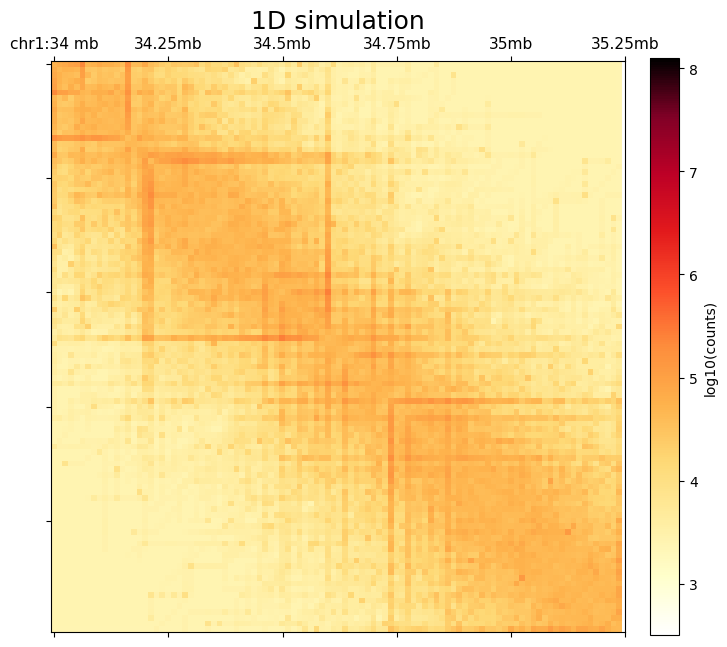

In [24]:
plt.figure(figsize=(8.1,8.1))  
matrix = new_m
padded_matrix = np.pad(matrix, ((0, 1), (0, 1)), mode='constant')
binned_matrix = padded_matrix.reshape(100, 50, 100, 50).sum(axis=(1, 3))
im = plt.matshow(np.log10(binned_matrix+1), vmax=8.1, vmin=2.5,cmap='fall', fignum=False)
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(counts)')
#plt.xticks([0,1000,2000, 3000, 4000],fontsize=14.5)
plt.title('1D simulation',fontsize=18)
plt.xticks([0, 20, 40, 60, 80, 100],fontsize=11.1)
plt.gca().set_xticklabels(['chr1:34 mb', '34.25mb', '34.5mb','34.75mb', '35mb','35.25mb'])
plt.gca().set_yticklabels([])
plt.savefig('{region}.png'.format(region=region))
plt.show()

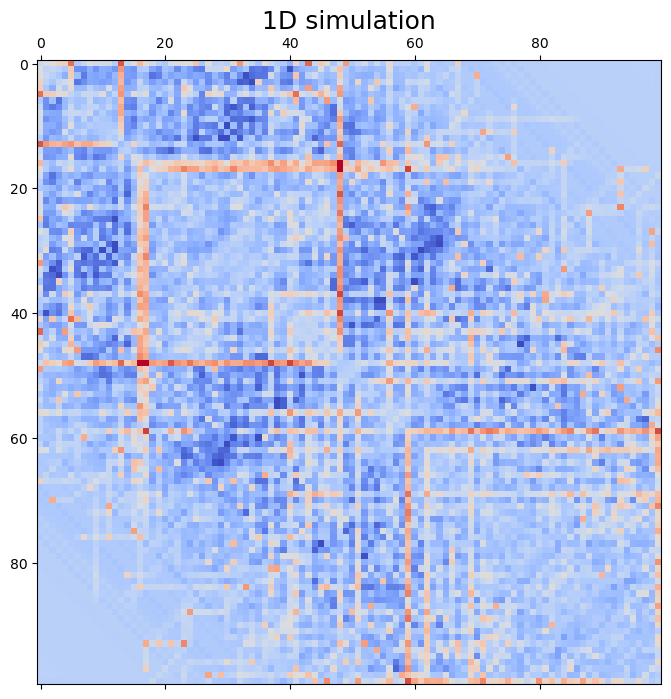

In [8]:
import chromoscores.maputils as chrmap
plt.figure(figsize=(8.1,8.1))  
mrc_exp=chrmap.get_observed_over_expected(binned_matrix)
#plt.matshow(np.log10(mrc_exp), vmax = 0.81,vmin = -0.5, cmap='coolwarm', fignum=False)
plt.title('1D simulation',fontsize=18)
plt.show()

In [9]:
path_dict_n = {}

directory = '/scratch1/rahmanin/Site_wise_occupancy/simulations/'
for name  in glob.glob(directory+'sims/chr6/folder_*'):
    path_dict_n[name.split('chr6/')[1][:]]= name
path_dict_n = dict(sorted(path_dict_n.items()))
len(path_dict_n)

1

In [37]:
#flipped
path_dict_n = {}

directory = '/scratch1/rahmanin/Site_wise_occupancy/simulations/'
for name  in glob.glob(directory+'sims/folder_*'):
    path_dict_n[name.split('sims/')[1][:]]= name
path_dict_n = dict(sorted(path_dict_n.items()))
len(path_dict_n)

1

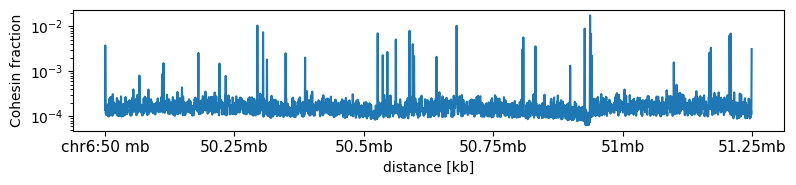

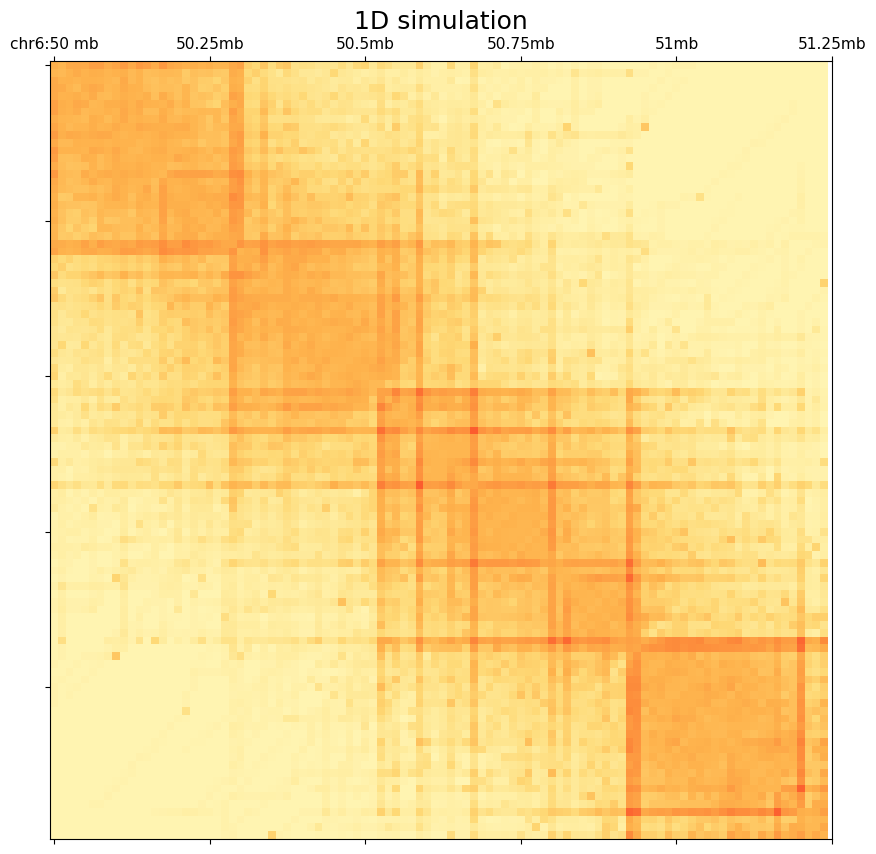

In [39]:
c = 1
for name in path_dict_n.keys():
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params

    c+=1
    mapN = mon*site
    lefs = h5py.File(path_dict_n[name]+'/LEFPositions.h5','r')["positions"]
    chip = utils_s.chip_seq_from_lef(lefs, mapN)
    lattice_size = 0.25 # in kb
    plt.figure(figsize = (8.1,1.95))
    plt.plot(np.arange(len(chip))*lattice_size,chip/np.sum(chip), label=name)
    plt.xticks([0, 250, 500, 750, 1000, 1250],fontsize=11.1)
    plt.gca().set_xticklabels(['chr6:50 mb', '50.25mb', '50.5mb','50.75mb', '51mb','51.25mb'])
    plt.ylabel('Cohesin fraction')
    plt.yscale('log')
    plt.xlabel('distance [kb]')
    plt.tight_layout()
    plt.show()
    region = 'chr1:34000000-35250000'
    region = 'chr6:50000000-51250000'
    plt.figure(figsize=(10.1,10.1))    
    with  h5py.File(path_dict_n[name]+'/LEFPositions.h5', mode='r') as myfile:
        lef_array = np.array(myfile['positions'])
        #print(lef_array.shape)   
    lef_array_snip = lef_array[:10]
    m = utils_s.contact_map_from_lefs(lef_array[:],5000)
    plt.title('1D simulation',fontsize=18) 
    new_m = adaptive_coarsegrain(m+1, m+1, cutoff = 3, max_levels=3, min_shape = 2)
    matrix = new_m
    padded_matrix = np.pad(matrix, ((0, 1), (0, 1)), mode='constant')
    binned_matrix = padded_matrix.reshape(100, 50, 100, 50).sum(axis=(1, 3))
    im = plt.matshow(np.log10(binned_matrix+1), vmax=8.1, vmin=2.5,cmap='fall', fignum=False)
    #plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')
    plt.xticks(utils_s.axes_ary(region)[0], fontsize = 6.1)
    plt.xticks([0, 20, 40, 60, 80, 100],fontsize=11.1)
    plt.gca().set_xticklabels(['chr6:50 mb', '50.25mb', '50.5mb','50.75mb', '51mb','51.25mb'])
    plt.gca().set_yticklabels([])
    plt.savefig('{region}.png'.format(region=region))
    plt.show()

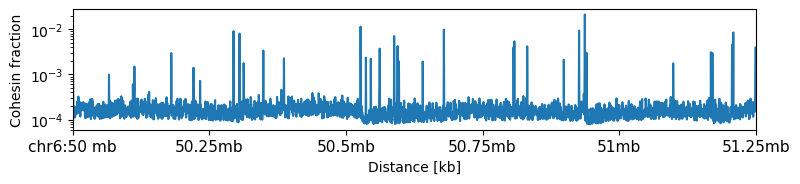

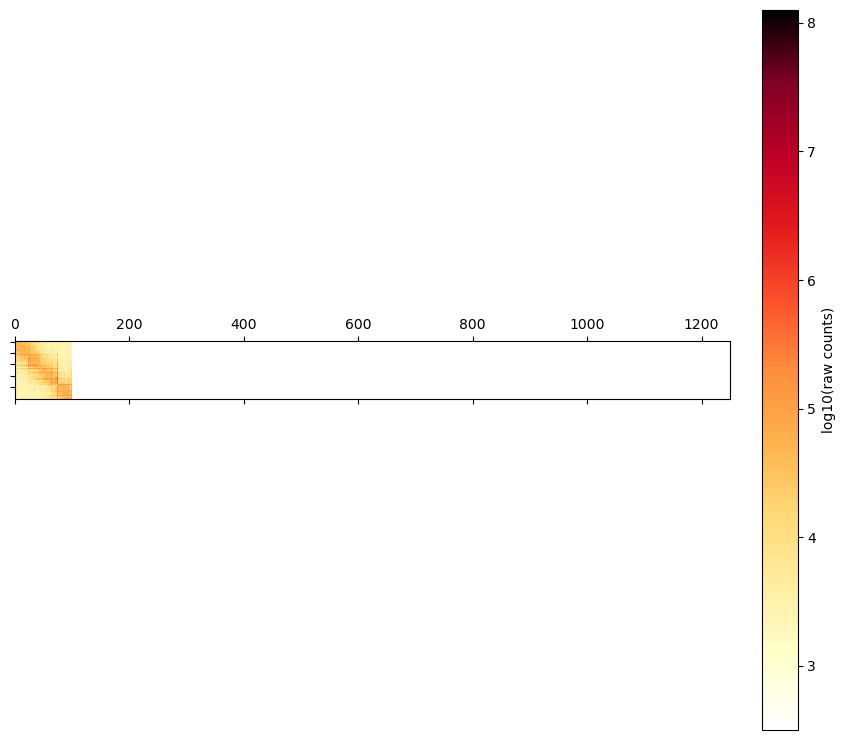

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import utils_s
import ast

c = 1
region = 'chr6:50000000-51250000'
common_xlim = (0, 1250)  # Define common x-axis range

for name in path_dict_n.keys():
    params = [ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params

    c += 1
    mapN = mon * site
    lefs = h5py.File(path_dict_n[name] + '/LEFPositions.h5', 'r')["positions"]
    chip = utils_s.chip_seq_from_lef(lefs, mapN)
    lattice_size = 0.25  # in kb

    # First Figure (Cohesin Fraction)
    plt.figure(figsize=(8.1, 1.95))
    plt.plot(np.arange(len(chip)) * lattice_size, chip / np.sum(chip), label=name)
    plt.xticks([0, 250, 500, 750, 1000, 1250], fontsize=11.1)
    plt.gca().set_xticklabels(['chr6:50 mb', '50.25mb', '50.5mb', '50.75mb', '51mb', '51.25mb'])
    plt.ylabel('Cohesin fraction')
    plt.yscale('log')
    plt.xlabel('Distance [kb]')
    plt.xlim(common_xlim)  # Ensure x-axis matches
    plt.tight_layout()
    plt.show()

    # Second Figure (Contact Map)
    plt.figure(figsize=(10.1, 10.1))
    with h5py.File(path_dict_n[name] + '/LEFPositions.h5', mode='r') as myfile:
        lef_array = np.array(myfile['positions'])

    m = utils_s.contact_map_from_lefs(lef_array[:], 5000)
    new_m = adaptive_coarsegrain(m + 1, m + 1, cutoff=3, max_levels=3, min_shape=2)
    matrix = new_m
    padded_matrix = np.pad(matrix, ((0, 1), (0, 1)), mode='constant')
    binned_matrix = padded_matrix.reshape(100, 50, 100, 50).sum(axis=(1, 3))

    im = plt.matshow(np.log10(binned_matrix + 1), vmax=8.1, vmin=2.5, cmap='fall', fignum=False)
    plt.colorbar(im, fraction=0.046, pad=0.04, label='log10(raw counts)')
    #plt.xticks([0, 20, 40, 60, 80, 100], fontsize=11.1)
    #plt.gca().set_xticklabels(['chr6:50 mb', '50.25mb', '50.5mb', '50.75mb', '51mb', '51.25mb'])
    plt.gca().set_yticklabels([])
    plt.xlim(common_xlim)  # Ensure x-axis matches
    plt.savefig(f'{region}.png')
    plt.show()


(1800000, 66, 2)


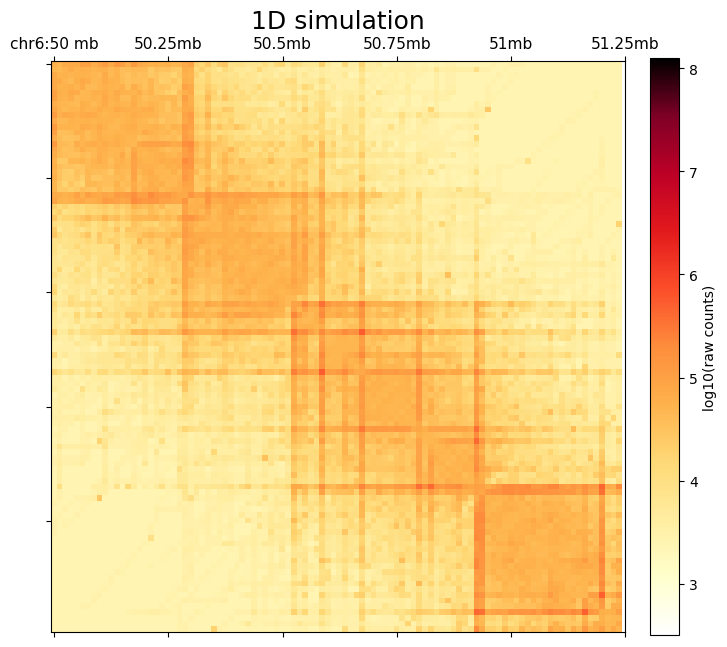

In [40]:
region = 'chr1:34000000-35250000'
region = 'chr6:50000000-51250000'
plt.figure(figsize=(8.1,8.1))    
with  h5py.File(path_dict_n[name]+'/LEFPositions.h5', mode='r') as myfile:
    lef_array = np.array(myfile['positions'])
    print(lef_array.shape)   
lef_array_snip = lef_array[:10]
m = utils_s.contact_map_from_lefs(lef_array[:],5000)
plt.title('1D simulation',fontsize=18) 
new_m = adaptive_coarsegrain(m+1, m+1, cutoff = 3, max_levels=3, min_shape = 2)
matrix = new_m
padded_matrix = np.pad(matrix, ((0, 1), (0, 1)), mode='constant')
binned_matrix = padded_matrix.reshape(100, 50, 100, 50).sum(axis=(1, 3))
im = plt.matshow(np.log10(binned_matrix+1), vmax=8.1, vmin=2.5,cmap='fall', fignum=False)
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')
plt.xticks(utils_s.axes_ary(region)[0], fontsize = 6.1)
plt.xticks([0, 20, 40, 60, 80, 100],fontsize=11.1)
plt.gca().set_xticklabels(['chr6:50 mb', '50.25mb', '50.5mb','50.75mb', '51mb','51.25mb'])
plt.gca().set_yticklabels([])
plt.savefig('{region}.png'.format(region=region))
plt.show()

(1800000, 66, 2)


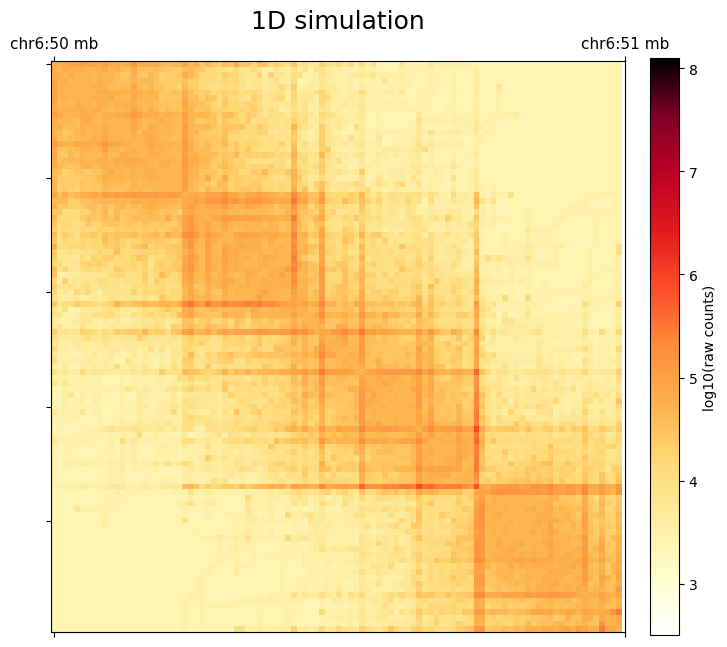

In [21]:
region = 'chr1:34000000-35250000'
region = 'chr6:50000000-51250000'
plt.figure(figsize=(8.1,8.1))    
with  h5py.File(path_dict_n[name]+'/LEFPositions.h5', mode='r') as myfile:
    lef_array = np.array(myfile['positions'])
    print(lef_array.shape)   
lef_array_snip = lef_array[:10]
m = utils_s.contact_map_from_lefs(lef_array[:],5000)
plt.title('1D simulation',fontsize=18) 
new_m = adaptive_coarsegrain(m+1, m+1, cutoff = 3, max_levels=3, min_shape = 2)
matrix = new_m
padded_matrix = np.pad(matrix, ((0, 1), (0, 1)), mode='constant')
binned_matrix = padded_matrix.reshape(100, 50, 100, 50).sum(axis=(1, 3))
im = plt.matshow(np.log10(binned_matrix+1), vmax=8.1, vmin=2.5,cmap='fall', fignum=False)
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')
plt.xticks(utils_s.axes_ary(region)[0], fontsize = 11)
plt.gca().set_xticklabels(utils_s.axes_ary(region)[1],fontsize = 11)
#plt.xticks([0, 20, 40, 60, 80, 100],fontsize=11.1)
#plt.gca().set_xticklabels(['chr6:50 mb', '50.25mb', '50.5mb','50.75mb', '51mb','51.25mb'])
plt.gca().set_yticklabels([])
plt.show()

In [19]:
utils_s.axes_ary(region)

([0, 100], ['chr6:50 mb', 'chr6:51 mb'])

In [5]:
region = 'chr6:50000000-51250000'
plt.figure(figsize=(8.1,8.1))    
with  h5py.File(path_dict_n[name]+'/LEFPositions.h5', mode='r') as myfile:
    lef_array = np.array(myfile['positions'])
    print(lef_array.shape)   
lef_array_snip = lef_array[:10]
m = utils_s.contact_map_from_lefs(lef_array[:],5000)
plt.title('1D simulation',fontsize=18) 
new_m = adaptive_coarsegrain(m+1, m+1, cutoff = 3, max_levels=3, min_shape = 2)
matrix = new_m
padded_matrix = np.pad(matrix, ((0, 1), (0, 1)), mode='constant')
binned_matrix = padded_matrix.reshape(100, 50, 100, 50).sum(axis=(1, 3))
im = plt.matshow(np.log10(binned_matrix+1), vmax=8.1, vmin=2.5,cmap='fall', fignum=False)
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')
plt.xticks(utils_s.axes_ary(region)[0], fontsize = 6.1)
plt.xticks([0,1000,2000, 3000, 4000, 5000],fontsize=14.5)
plt.gca().set_xticklabels(['chr1:34 mb', '34.25mb', '34.5mb','34.75mb', '35mb', '35.25 mb'])
plt.gca().set_yticklabels([])
plt.show()

KeyError: '/scratch1/rahmanin/Site_wise_occupancy/simulations/sims/chr6/folder_face_1.0_back_0_Clife_150.0_Cof_150.0_life_660.0_slife_660.0_birth_0.1_pause_0.9_sep_75_site_10_monomer_500_replica_10_steps_175.0_vel_1'

<Figure size 810x810 with 0 Axes>

In [16]:
name

'/scratch1/rahmanin/Site_wise_occupancy/simulations/sims/chr6/folder_face_1.0_back_0_Clife_150.0_Cof_150.0_life_660.0_slife_660.0_birth_0.1_pause_0.9_sep_75_site_10_monomer_500_replica_10_steps_175.0_vel_1'

In [15]:
path_dict

{'folder_face_1.0_back_0_Clife_150.0_Cof_150.0_life_660.0_slife_660.0_birth_0.1_pause_0.9_sep_75_site_10_monomer_500_replica_10_steps_175.0_vel_1': '/scratch1/rahmanin/Site_wise_occupancy/simulations/sims/chr6/folder_face_1.0_back_0_Clife_150.0_Cof_150.0_life_660.0_slife_660.0_birth_0.1_pause_0.9_sep_75_site_10_monomer_500_replica_10_steps_175.0_vel_1'}

### creating 3D maps

In [91]:
path_dict = {}

directory = '/scratch1/rahmanin/Site_wise_occupancy/simulations/other_sims/'
for name  in glob.glob(directory+'sims/folder_*'):
    path_dict[name.split('/sims/')[1][:]]= name
path_dict = dict(sorted(path_dict.items()))
len(path_dict)

2

In [63]:
monomer_per_replica = 400

mapN = monomer_per_replica #number of monomer to 
total_monomers = 400
mapstarts = (np.arange(0,270 , monomer_per_replica))
min_time = 0
max_time = 1500000000
skip_freq = 1
refresh = True
if refresh== True:
    map_dict_eq = {}
i=1
for name in list(path_dict.keys())[1:]:
    print(name)
    print(i)
    i+=1
    URIs = polychrom.hdf5_format.list_URIs(path_dict[name])
    URIs_eq = np.array(URIs)[(np.array([int(i.split("::")[-1]) for i in URIs]) > min_time)&(np.array([int(i.split("::")[-1]) for i in URIs]) < max_time)][::skip_freq]
    mrc = polychrom.contactmaps.monomerResolutionContactMapSubchains(
        URIs_eq,
        mapstarts,
        mapN,
        cutoff=2.3,
        n=8)
    map_dict_eq[name] = mrc
    np.savez_compressed('data/maps/%s.npz' % name, mrc)
    

folder_face_1.0_back_0_Clife_150.0_Cof_150.0_life_660.0_slife_660.0_birth_0.1_pause_0.9_sep_75_site_10_monomer_400_replica_1_steps_175.0_vel_1
1


In [ ]:
monomer_per_replica = 400

mapN = 3 * monomer_per_replica #number of monomer to 
total_monomers = 4000
mapstarts = (np.arange(0,2700 , monomer_per_replica))
min_time = 0
max_time = 1500000000
skip_freq = 1
refresh = True
if refresh== True:
    map_dict_eq = {}
i=1
for name in list(path_dict.keys())[1:]:
    print(name)
    print(i)
    i+=1
    URIs = polychrom.hdf5_format.list_URIs(path_dict[name])
    URIs_eq = np.array(URIs)[(np.array([int(i.split("::")[-1]) for i in URIs]) > min_time)&(np.array([int(i.split("::")[-1]) for i in URIs]) < max_time)][::skip_freq]
    mrc = polychrom.contactmaps.monomerResolutionContactMapSubchains(
        URIs_eq,
        mapstarts,
        mapN,
        cutoff=2.3,
        n=8)
    map_dict_eq[name] = mrc
    np.savez_compressed('data/maps/%s.npz' % name, mrc)

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


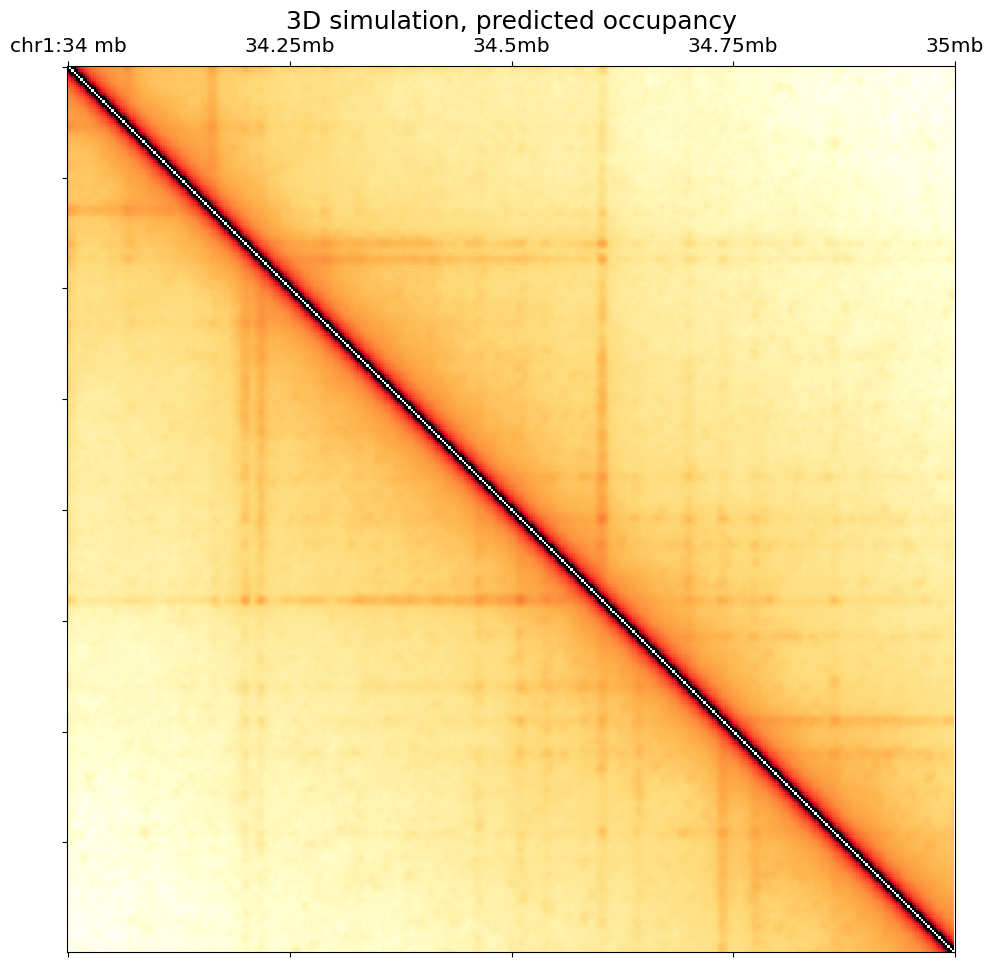

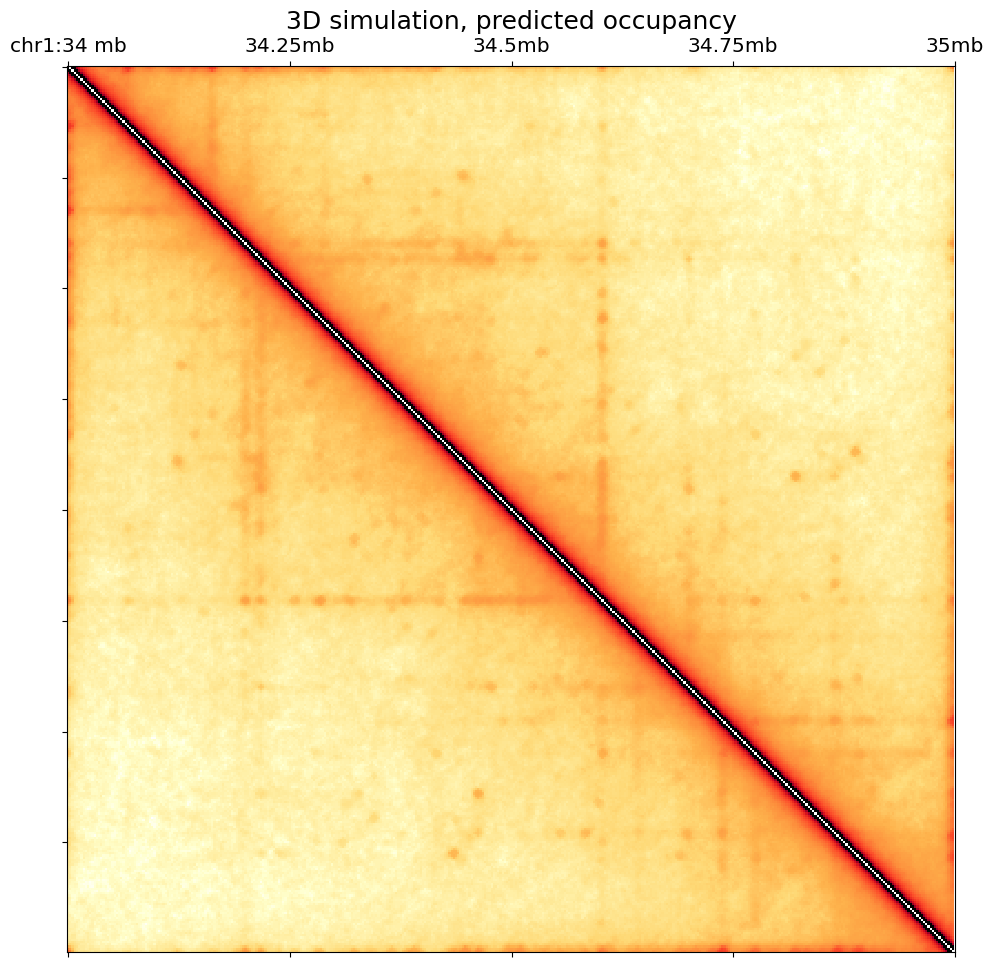

In [95]:
c =1
for name in list(path_dict.keys())[:]:
    c+=1
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
    plt.figure(figsize=(10,10))
    data=np.load('data/maps/%s.npz' % name)
    mrc=data['arr_0']
    mrc  = mrc.astype(float)
    mrc /= np.median(np.diag(mrc,2))
    mat = np.log10(mrc)
    vmax = np.median(np.diag(mat,2))
    vmin = vmax - 3
    im = plt.matshow(mat[:400,:400], cmap='fall', fignum=False)
    plt.xticks([0,100,200, 300, 400],fontsize=14.5)
    plt.title('3D simulation, predicted occupancy',fontsize=18)
    #plt.yticks([0,100,200,300,400,500],fontsize=8.1)
    plt.gca().set_xticklabels(['chr1:34 mb', '34.25mb', '34.5mb','34.75mb', '35mb'])
    plt.gca().set_yticklabels([])

    plt.tight_layout()
    plt.savefig('map_with_predicted_occup_rep_%s.png'%rep)
    plt.show()

In [99]:
path_dict = {}

directory = '/scratch1/rahmanin/Site_wise_occupancy/simulations/other_sims/'
for name  in glob.glob(directory+'sims_fixed/folder_*'):
    path_dict[name.split('/sims_fixed/')[1][:]]= name
path_dict = dict(sorted(path_dict.items()))
len(path_dict)

3

In [98]:
monomer_per_replica = 400

mapN = monomer_per_replica #number of monomer to 
total_monomers = 400
mapstarts = (np.arange(0,270 , monomer_per_replica))
min_time = 0
max_time = 1500000000
skip_freq = 3
refresh = True
if refresh== True:
    map_dict_eq = {}
i=1
for name in list(path_dict.keys())[:]:
    print(name)
    print(i)
    i+=1
    URIs = polychrom.hdf5_format.list_URIs(path_dict[name])
    URIs_eq = np.array(URIs)[(np.array([int(i.split("::")[-1]) for i in URIs]) > min_time)&(np.array([int(i.split("::")[-1]) for i in URIs]) < max_time)][::skip_freq]
    mrc = polychrom.contactmaps.monomerResolutionContactMapSubchains(
        URIs_eq,
        mapstarts,
        mapN,
        cutoff=2.3,
        n=8)
    map_dict_eq[name] = mrc
    np.savez_compressed('data/maps_fixed/%s.npz' % name, mrc)

folder_face_1.0_back_0_Clife_150.0_Cof_150.0_life_660.0_slife_660.0_birth_0.1_pause_0.9_sep_75_site_10_monomer_500_replica_10_steps_175.0_vel_1
1


ValueError: No files found in folder /scratch1/rahmanin/Site_wise_occupancy/simulations/sims_fixed/folder_face_1.0_back_0_Clife_150.0_Cof_150.0_life_660.0_slife_660.0_birth_0.1_pause_0.9_sep_75_site_10_monomer_500_replica_10_steps_175.0_vel_1

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


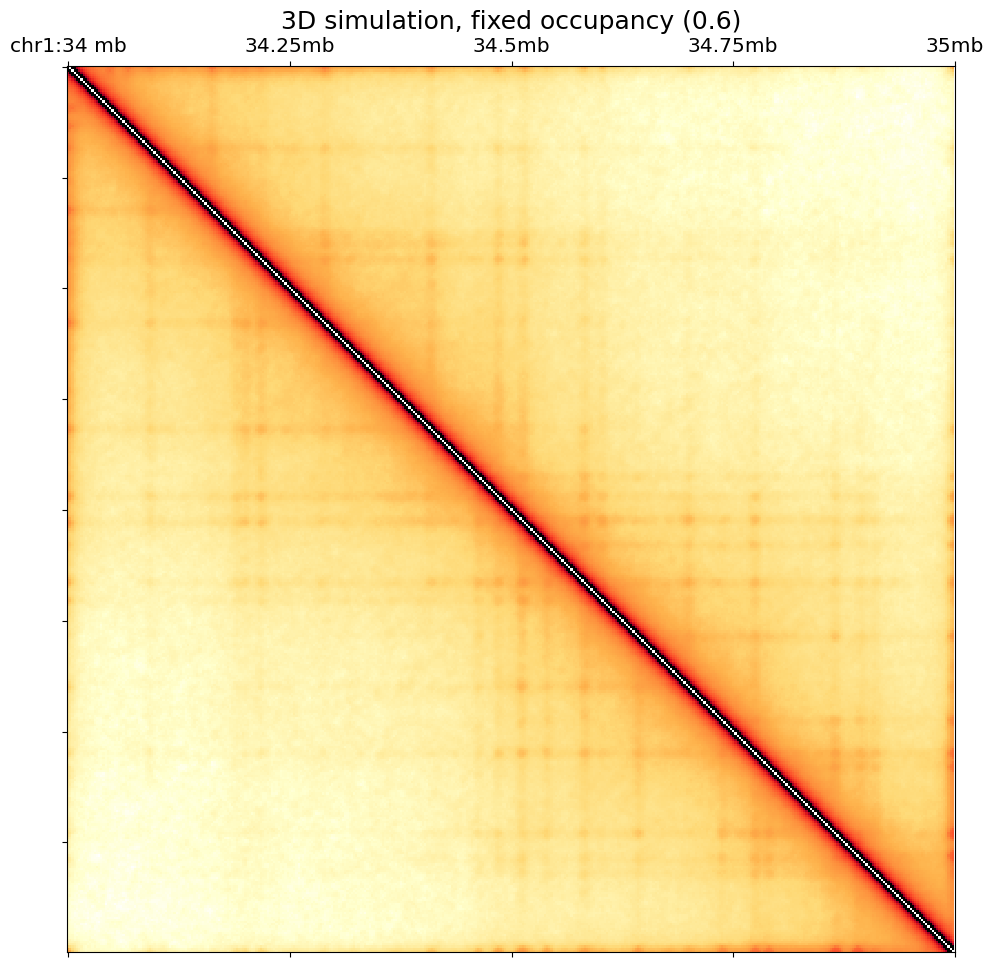

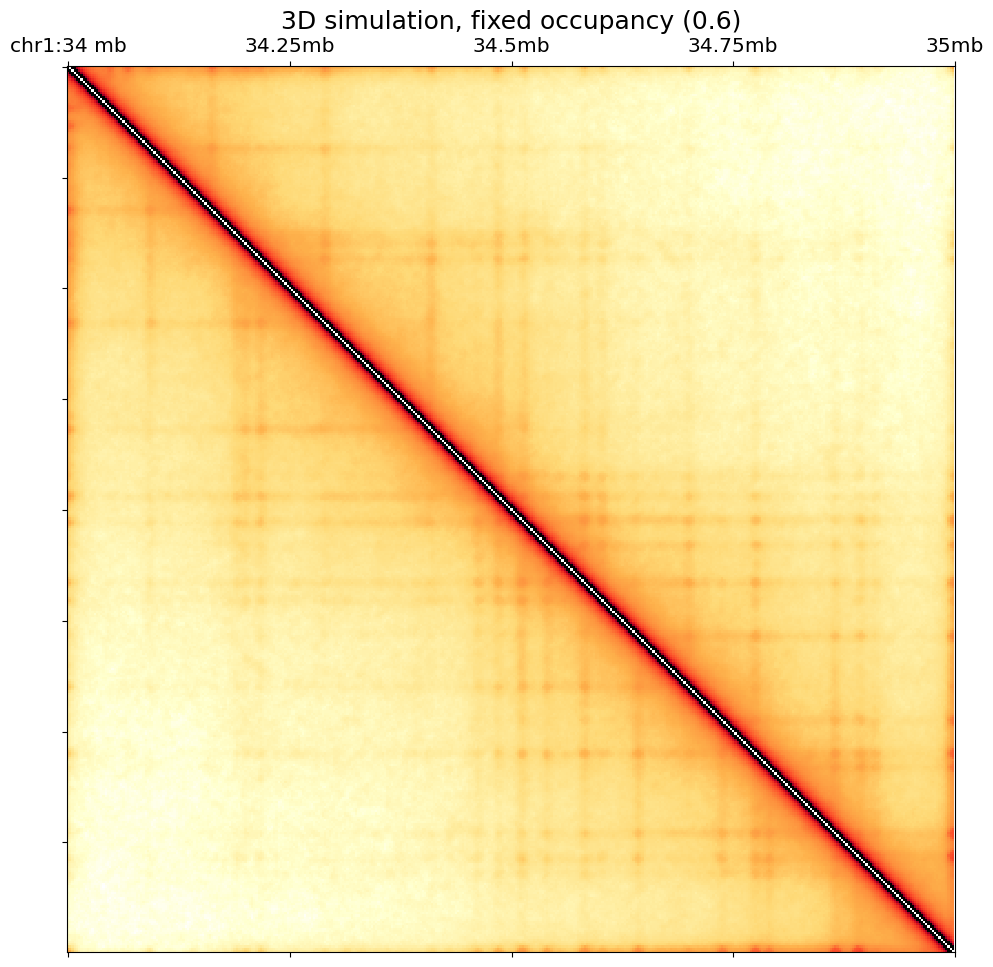

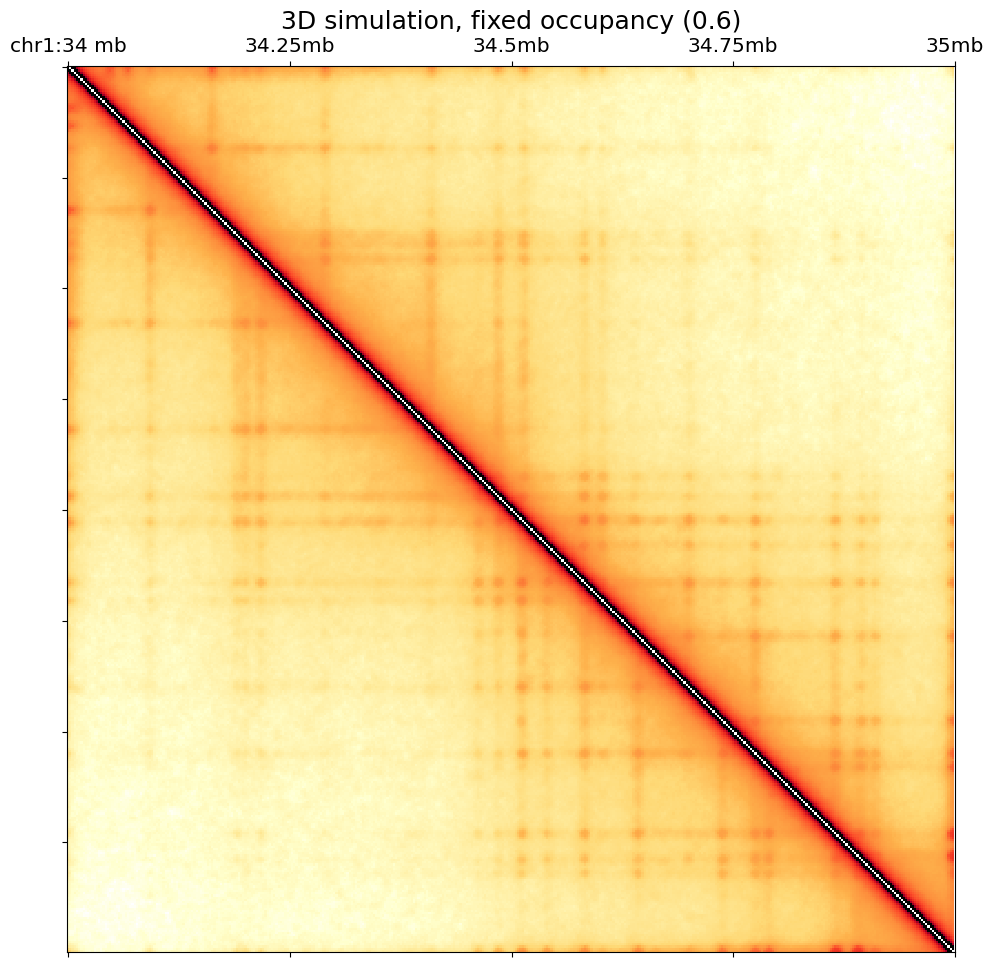

In [100]:
c =1
for name in list(path_dict.keys())[:]:
    c+=1
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
    plt.figure(figsize=(10,10))
    data=np.load('data/maps_fixed/%s.npz' % name)
    mrc=data['arr_0']
    mrc  = mrc.astype(float)
    mrc /= np.median(np.diag(mrc,2))
    mat = np.log10(mrc)
    vmax = np.median(np.diag(mat,2))
    vmin = vmax - 3
    im = plt.matshow(mat[:400,:400], cmap='fall', fignum=False)
    plt.xticks([0,100,200, 300, 400],fontsize=14.5)
    plt.title('3D simulation, fixed occupancy (0.6)',fontsize=18)
    #plt.yticks([0,100,200,300,400,500],fontsize=8.1)
    plt.gca().set_xticklabels(['chr1:34 mb', '34.25mb', '34.5mb','34.75mb', '35mb'])
    plt.gca().set_yticklabels([])

    plt.tight_layout()
    plt.savefig('maps_with_fixed_occup_%s.png'%clife)
    plt.show()